#### **Name: Angad Gupta**
#### **Enroll No: 21SOECE11614**
#### **Roll No: 14**
#### **Implement a Feed forward neural network with backpropagation for multiple output.**
The network will have one hidden layer and will be trained on the make_moons dataset. To accommodate multiple outputs, we'll use the softmax activation function in the output layer, which is typically used for multi-class classification.

In [40]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [41]:
np.random.seed(42)
cat1 = np.random.randn(800, 2) + np.array([0, -3])
cat2 = np.random.randn(800, 2) + np.array([3, 3])
cat3 = np.random.randn(800, 2) + np.array([-3, 3])

In [42]:
X = np.vstack([cat1, cat2, cat3])

In [43]:
labels = np.array([0] * 800 + [1] * 800 + [2] * 800)
y = np.zeros((2400, 3))
for i in range(2400):
  y[i, labels[i]] = 1

In [44]:
print(X.shape)
print(y.shape)

(2400, 2)
(2400, 3)


<ipython-input-45-35d31daecd75>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x1, x2, c = y, cmap = plt.cm.coolwarm)


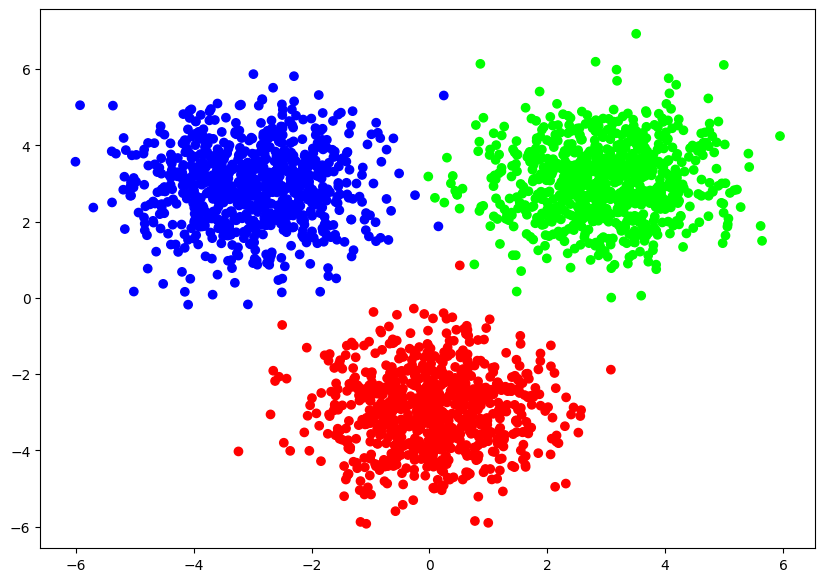

In [45]:
# plot our dataset to see the three classes
x1 = X[:, 0]
x2 = X[:, 1]
plt.figure(figsize = (10, 7))
plt.scatter(x1, x2, c = y, cmap = plt.cm.coolwarm)

In [46]:
# Function to define parameters

def define_parameters(weights):
  weight_list = []
  bias_list = []
  for i in range(len(weights) - 1):
    w = np.random.randn(weights[i], weights[i+1])
    b = np.random.randn()
    weight_list.append(w)
    bias_list.append(b)
  return weight_list, bias_list

In [47]:
# Define Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Define Softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [48]:
# Define Feed Forword Neural network

def predictions(w, b, x):
  zh = np.dot(X, w[0])+ b[0]
  ah = sigmoid(zh)

  z0 = np.dot(ah, w[1]) + b[1]
  a0 = sigmoid(z0)
  return a0

In [49]:
# Define cost function (cross-entropy loss)
def find_cost(a0, y):
    m = y.shape[0]
    log_likelihood = -np.log(a0[range(m), np.argmax(y, axis=1)])
    loss = np.sum(log_likelihood) / m
    return loss

In [50]:
# Implement backpropagation with derivatives

def find_derivatives(w, b, x):
  zh = np.dot(X, w[0]) + b[0]
  ah = sigmoid(zh)
  zo = np.dot(ah, w[1]) + b[1]
  ao = softmax(zo)

  # Backpropagation phase 1
  dcost_dzo = (ao - y)
  dzo_dwo = ah.T
  dwo = np.dot(dzo_dwo, dcost_dzo)
  dbo = np.sum(dcost_dzo)
  dzo_dah = w[1].T
  dcost_dah = np.dot(dcost_dzo, dzo_dah)
  dah_dzh = sigmoid_der(zh)
  dzh_dwh = X.T
  dwh = np.dot(dzh_dwh, dah_dzh * dcost_dah)
  dbh = np.sum(dah_dzh * dcost_dah)
  return dwh, dbh, dwo, dbo

In [51]:
# Update weights function
def update_weights(w, b, dwh, dbh, dwo, dbo, lr):
  w[0] = w[0] - lr * dwh
  w[1] = w[1] - lr * dwo
  b[0] = b[0] - lr * dbh
  b[1] = b[1] - lr * dbo
  return w, b

In [52]:
# Neural Network function
def my_multiout_neural_network(X, y, lr, epochs):
    error_list = []
    input_len = X.shape[1]
    output_len = y.shape[1]
    w, b = define_parameters([input_len, 4, output_len])
    for i in range(epochs):
        ao = predictions(w, b, X)
        cost = find_cost(ao, y)
        error_list.append(cost)
        dwh, dbh, dwo, dbo = find_derivatives(w, b, X)
        w, b = update_weights(w, b, dwh, dbh, dwo, dbo, lr)
        if i % 50 == 0:
            print(f"Cost at epoch {i}: {cost}")
    return w, b, error_list

In [53]:
# Set learning rate and epochs
lr = 0.0005
epochs = 2000

# Train the neural network
w,b, error_list = my_multiout_neural_network(X,y,lr,epochs)

Cost at epoch 0: 1.0320353116256051
Cost at epoch 50: 0.10732676278042542
Cost at epoch 100: 0.06493597725110868
Cost at epoch 150: 0.04825815351962656
Cost at epoch 200: 0.03905652214796975
Cost at epoch 250: 0.03311041058306958
Cost at epoch 300: 0.02889438483859798
Cost at epoch 350: 0.025716263473824517
Cost at epoch 400: 0.023214342722488426
Cost at epoch 450: 0.021180677066618366
Cost at epoch 500: 0.019487754991992977
Cost at epoch 550: 0.01805448480192074
Cost at epoch 600: 0.016829002932034817
Cost at epoch 650: 0.01577880753582995
Cost at epoch 700: 0.014883131186986344
Cost at epoch 750: 0.014125140172216662
Cost at epoch 800: 0.013485774052175306
Cost at epoch 850: 0.012943090536131885
Cost at epoch 900: 0.01247598295606543
Cost at epoch 950: 0.012067323866726877
Cost at epoch 1000: 0.011704556908066323
Cost at epoch 1050: 0.011378817824063227
Cost at epoch 1100: 0.011083806842560691
Cost at epoch 1150: 0.0108148992727479
Cost at epoch 1200: 0.0105685517130456
Cost at epoch

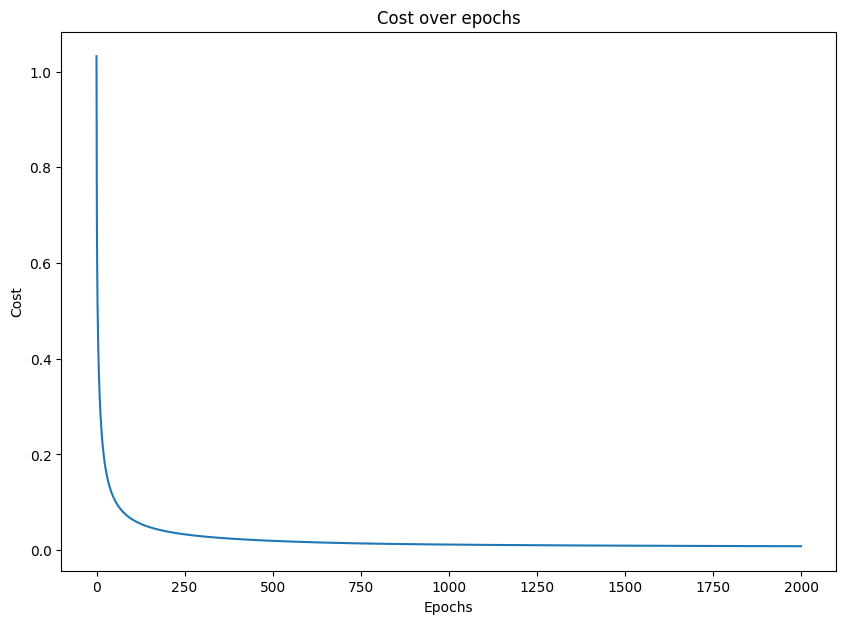

In [54]:
# Plot the error over epochs
plt.figure(figsize=(10, 7))
plt.plot(error_list)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost over epochs')
plt.show()